In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OrdinalEncoder

from featimp import (
    get_corr_importances,
    get_chi2_crosstab_importances,
    get_chi2_importances,
    get_anova_importances,
    get_mutual_info_importances,
    get_ml_importances,
    get_permutation_importances,
    get_feature_importances,
    get_fi_plots,
    )

sns.set()
warnings.simplefilter("ignore")
cm = sns.light_palette("green", as_cmap=True)

# Data Preparations

In [2]:
SEED = 10
random.seed(SEED)
np.random.seed(SEED)
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['sex'] = df_diabetes['sex'].astype(str)
df_diabetes['sex'].replace({'0.0506801187398187':'M', '-0.044641636506989':'F'}, inplace=True)
df_diabetes['random_cat_col'] = np.random.choice(['A', 'B', 'C'], size=len(df_diabetes), p=[0.9, 0.05, 0.05])
df_diabetes['target_reg'] = diabetes_data['target']
df_diabetes['target_clf'] = pd.cut(diabetes_data['target'], 4)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,random_cat_col,target_reg,target_clf
0,0.038076,M,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,A,151.0,"(105.25, 185.5]"
1,-0.001882,F,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,A,75.0,"(24.679, 105.25]"
2,0.085299,M,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,A,141.0,"(105.25, 185.5]"
3,-0.089063,F,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,A,206.0,"(185.5, 265.75]"
4,0.005383,F,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,A,135.0,"(105.25, 185.5]"


In [3]:
cat_features = list(df_diabetes.select_dtypes('object').columns)
num_features = list(df_diabetes.select_dtypes('float').columns)
num_features.remove("target_reg")
features = num_features + cat_features
print("cat_features:", cat_features)
print("num_features:", num_features)

cat_features: ['sex', 'random_cat_col']
num_features: ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Correlation Importances

In [4]:
corr_df = get_corr_importances(data=df_diabetes, num_features=num_features, target='target_reg')
corr_df.style.background_gradient(cmap=cm)

,Corr
bmi,0.586450
s5,0.565883
bp,0.441484
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
s3,-0.394789


# Chi2 Crosstab Importances

In [5]:
cat_corr_df = get_chi2_crosstab_importances(data=df_diabetes, cat_features=cat_features, target='target_clf')
cat_corr_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab
sex,0.000000
random_cat_col,0.000000


# Chi2 Importances

In [6]:
df_diabetes_enc = pd.DataFrame(OrdinalEncoder().fit_transform(df_diabetes[cat_features+['target_clf']]), columns=cat_features+['target_clf'])
chi2_df = get_chi2_importances(data=df_diabetes_enc, features=cat_features, target='target_clf')
chi2_df.style.background_gradient(cmap=cm)

,Chi_Square
random_cat_col,1.156366
sex,0.743798


# ANOVA Importances

In [7]:
df_diabetes_enc = pd.DataFrame(OrdinalEncoder().fit_transform(df_diabetes[cat_features+['target_clf']]), columns=cat_features+['target_clf'])
df_diabetes_enc = pd.concat([df_diabetes_enc, df_diabetes[num_features]], axis=1)
df_diabetes_enc['target_reg'] = df_diabetes['target_reg']
df_diabetes_enc.head()

,sex,random_cat_col,target_clf,age,bmi,bp,s1,s2,s3,s4,s5,s6,target_reg
0,1.0,0.0,1.0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,0.0,0.0,0.0,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,1.0,0.0,1.0,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.0,0.0,2.0,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.0,0.0,1.0,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
anova_df = get_anova_importances(data=df_diabetes_enc, features=num_features, target='target_clf')
anova_df.style.background_gradient(cmap=cm)

,ANOVA
bmi,216.274934
s5,195.290130
bp,102.341164
s4,88.822664
s3,73.436993
s6,71.660065
s1,21.119417
age,14.437754
s2,13.227270


In [9]:
anova_df = get_anova_importances(data=df_diabetes_enc, features=cat_features, target='target_reg')
anova_df.style.background_gradient(cmap=cm)

,ANOVA
sex,0.817423
random_cat_col,0.387639


# Mution Informaton Importances

In [10]:
df_diabetes_enc = pd.DataFrame(OrdinalEncoder().fit_transform(df_diabetes[cat_features+['target_clf']]), columns=cat_features+['target_clf'])
df_diabetes_enc = pd.concat([df_diabetes_enc, df_diabetes[num_features]], axis=1)
df_diabetes_enc['target_reg'] = df_diabetes['target_reg']
df_diabetes_enc.head()

,sex,random_cat_col,target_clf,age,bmi,bp,s1,s2,s3,s4,s5,s6,target_reg
0,1.0,0.0,1.0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,0.0,0.0,0.0,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,1.0,0.0,1.0,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.0,0.0,2.0,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.0,0.0,1.0,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [11]:
mi_scores_df = get_mutual_info_importances(data=df_diabetes_enc, features=cat_features, target='target_clf')
mi_scores_df.style.background_gradient(cmap=cm)

,MI Scores
sex,0.020257
random_cat_col,0.000000


# Machine Learning Importances

In [12]:
df_diabetes_enc = pd.DataFrame(OrdinalEncoder().fit_transform(df_diabetes[cat_features+['target_clf']]), columns=cat_features+['target_clf'])
df_diabetes_enc = pd.concat([df_diabetes_enc, df_diabetes[num_features]], axis=1)
df_diabetes_enc['target_reg'] = df_diabetes['target_reg']
df_diabetes_enc.head()

,sex,random_cat_col,target_clf,age,bmi,bp,s1,s2,s3,s4,s5,s6,target_reg
0,1.0,0.0,1.0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,0.0,0.0,0.0,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,1.0,0.0,1.0,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.0,0.0,2.0,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.0,0.0,1.0,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
ml_importance_df = get_ml_importances(data=df_diabetes_enc, num_features=num_features, cat_features=cat_features, target='target_clf', fold_type='skf', 
                                        nfold=10, model_name='LGBM', task='clf_multiable', random_state=0, early_stopping_rounds=100)
ml_importance_df.style.background_gradient(cmap=cm)

,LGBM Imp.
bmi,169.900000
s5,154.400000
bp,143.200000
s6,141.400000
s3,116.200000
s2,102.400000
age,87.300000
s1,81.400000
sex,28.600000
s4,22.400000


In [14]:
ml_importance_df = get_ml_importances(data=df_diabetes_enc, num_features=num_features, cat_features=cat_features, target='target_clf', fold_type='skf', 
                                        nfold=10, model_name='CATBOOST', task='clf_multiable', random_state=0, early_stopping_rounds=100)
ml_importance_df.style.background_gradient(cmap=cm)

,CATBOOST Imp.
bmi,20.616023
s5,17.887469
bp,11.037236
s6,9.749698
s3,8.197360
sex,6.525111
age,6.468238
s2,5.366277
random_cat_col,5.260956
s1,4.537960


In [15]:
ml_importance_df = get_ml_importances(data=df_diabetes_enc, num_features=num_features, cat_features=cat_features, target='target_reg', fold_type='kf', 
                                        nfold=10, model_name='LGBM', task='reg', random_state=0, early_stopping_rounds=100)
ml_importance_df.style.background_gradient(cmap=cm)

,LGBM Imp.
bmi,58.700000
s5,49.000000
bp,45.600000
age,31.700000
s6,29.700000
s3,29.000000
s2,25.500000
s1,23.100000
sex,13.800000
s4,7.900000


In [16]:
ml_importance_df = get_ml_importances(data=df_diabetes_enc, num_features=num_features, cat_features=cat_features, target='target_reg', fold_type='kf', 
                                        nfold=10, model_name='CATBOOST', task='reg', random_state=0, early_stopping_rounds=100)
ml_importance_df.style.background_gradient(cmap=cm)

,CATBOOST Imp.
bmi,26.461635
s5,24.093912
bp,11.402720
s6,6.365559
s3,5.981915
s4,5.409009
sex,5.406771
age,5.292221
s2,4.108192
s1,3.472342


# Permutation Importances

In [17]:
df_diabetes_enc = pd.DataFrame(OrdinalEncoder().fit_transform(df_diabetes[cat_features+['target_clf']]), columns=cat_features+['target_clf'])
df_diabetes_enc = pd.concat([df_diabetes_enc, df_diabetes[num_features]], axis=1)
df_diabetes_enc['target_reg'] = df_diabetes['target_reg']
df_diabetes_enc.head()

,sex,random_cat_col,target_clf,age,bmi,bp,s1,s2,s3,s4,s5,s6,target_reg
0,1.0,0.0,1.0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,0.0,0.0,0.0,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,1.0,0.0,1.0,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,0.0,0.0,2.0,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.0,0.0,1.0,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [18]:
from sklearn.ensemble import RandomForestClassifier
permutation_importance_df = get_permutation_importances(data=df_diabetes_enc, features=features, target='target_clf', fold_type='skf', nfold=10, 
                                                        score='f1_macro', model_base=RandomForestClassifier(random_state=0), random_state=0, n_repeats=30)
permutation_importance_df.style.background_gradient(cmap=cm)

,PI mean,PI std
bmi,0.062819,0.053561
s5,0.061208,0.056697
s3,0.016250,0.046541
s6,0.015818,0.044376
bp,0.010131,0.041726
s1,0.009237,0.042414
s2,0.004032,0.031186
s4,0.002070,0.036464
sex,0.001872,0.018955
random_cat_col,-0.002290,0.006950


In [19]:
from sklearn.ensemble import RandomForestRegressor
permutation_importance_df = get_permutation_importances(data=df_diabetes_enc, features=features, target='target_reg', fold_type='kf', nfold=10, 
                                                        score='neg_mean_squared_error', model_base=RandomForestRegressor(random_state=0), random_state=0, n_repeats=30)
permutation_importance_df.style.background_gradient(cmap=cm)

,PI mean,PI std
s5,1259.065447,533.700470
bmi,1223.077158,527.006157
bp,197.191804,244.111701
sex,34.606778,78.494653
s3,23.525561,111.888425
random_cat_col,-1.976138,21.080499
s6,-2.492757,133.400074
s4,-4.597014,56.505475
age,-17.577366,104.860447
s2,-18.022384,89.072639


# All Feature Importances

In [20]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', method='all')
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,Chi_Square,ANOVA,MI Scores,LGBM Imp.,PI mean,PI std,Rank
bmi,nan,nan,216.274934,nan,180.200000,0.071546,0.039212,0.876012
s5,nan,nan,195.290130,nan,157.300000,0.070100,0.038028,0.751379
bp,nan,nan,102.341164,nan,154.100000,0.009599,0.040023,0.140712
s6,nan,nan,71.660065,nan,153.200000,0.011304,0.044036,0.075817
s3,nan,nan,73.436993,nan,135.000000,0.011237,0.037807,0.027495
s2,nan,nan,13.227270,nan,110.400000,0.008102,0.030020,-0.205987
age,nan,nan,14.437754,nan,99.200000,0.001444,0.023776,-0.277029
s1,nan,nan,21.119417,nan,83.900000,0.000005,0.032593,-0.313996
sex,0.000000,0.743798,nan,0.020257,31.000000,-0.005779,0.014727,-0.341454
s4,nan,nan,88.822664,nan,25.700000,-0.004348,0.034517,-0.346899


In [21]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', ml_model_name='CATBOOST', method='all')
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,Chi_Square,ANOVA,MI Scores,CATBOOST Imp.,PI mean,PI std,Rank
bmi,nan,nan,216.274934,nan,19.457646,0.071546,0.039212,1.001793
s5,nan,nan,195.290130,nan,17.649484,0.070100,0.038028,0.882114
bp,nan,nan,102.341164,nan,11.696853,0.009599,0.040023,0.080986
s6,nan,nan,71.660065,nan,9.934379,0.011304,0.044036,-0.040438
s3,nan,nan,73.436993,nan,8.747293,0.011237,0.037807,-0.076440
random_cat_col,0.000000,1.156366,nan,0.000000,5.606375,0.001207,0.001469,-0.208928
sex,0.000000,0.743798,nan,0.020257,5.951335,-0.005779,0.014727,-0.241270
s4,nan,nan,88.822664,nan,4.817034,-0.004348,0.034517,-0.269575
s2,nan,nan,13.227270,nan,5.394870,0.008102,0.030020,-0.351888
age,nan,nan,14.437754,nan,6.312613,0.001444,0.023776,-0.360073


In [22]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_reg', task='reg', method='all')
fi_df.style.background_gradient(cmap=cm)

,Corr,ANOVA,LGBM Imp.,PI mean,PI std,Rank
bmi,0.586450,nan,58.700000,9.346436,2.970689,1.327462
s5,0.565883,nan,49.000000,9.603256,3.055636,1.166003
bp,0.441484,nan,45.600000,1.302515,1.745125,0.331660
sex,nan,0.817423,13.800000,0.533221,0.441664,-0.056678
s3,0.394789,nan,29.000000,0.093670,0.857867,-0.077663
s6,0.382483,nan,29.700000,-0.140665,0.836233,-0.104505
s4,0.430453,nan,7.900000,-0.126691,0.483035,-0.344452
age,0.187889,nan,31.700000,-0.083505,0.807864,-0.404833
s1,0.212022,nan,23.100000,-0.351094,0.534298,-0.509320
s2,0.174054,nan,25.500000,-0.195623,0.616224,-0.528203


In [23]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_reg', task='reg', ml_model_name='CATBOOST', method='all')
fi_df.style.background_gradient(cmap=cm)

,Corr,ANOVA,CATBOOST Imp.,PI mean,PI std,Rank
bmi,0.586450,nan,26.461635,9.346436,2.970689,1.425762
s5,0.565883,nan,24.093912,9.603256,3.055636,1.333782
bp,0.441484,nan,11.402720,1.302515,1.745125,0.151384
sex,nan,0.817423,5.406771,0.533221,0.441664,0.046275
s4,0.430453,nan,5.409009,-0.126691,0.483035,-0.153952
s3,0.394789,nan,5.981915,0.093670,0.857867,-0.182016
s6,0.382483,nan,6.365559,-0.140665,0.836233,-0.207191
age,0.187889,nan,5.292221,-0.083505,0.807864,-0.570871
random_cat_col,nan,0.387639,2.005725,-0.022415,0.130078,-0.598694
s1,0.212022,nan,3.472342,-0.351094,0.534298,-0.604988


In [24]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', 
                                method=['chi2_crosstab', 'anova', 'ml'])
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,ANOVA,LGBM Imp.,Rank
bmi,nan,216.274934,180.200000,1.051981
s5,nan,195.290130,157.300000,0.820897
bp,nan,102.341164,154.100000,0.360073
s6,nan,71.660065,153.200000,0.208856
s3,nan,73.436993,135.000000,0.113056
s2,nan,13.227270,110.400000,-0.314501
age,nan,14.437754,99.200000,-0.372898
sex,0.000000,nan,31.000000,-0.410945
s1,nan,21.119417,83.900000,-0.428736
s4,nan,88.822664,25.700000,-0.439828


In [25]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', 
                                method=['chi2_crosstab', 'pi', 'anova'])
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,PI mean,PI std,ANOVA,Rank
bmi,nan,0.071546,0.039212,216.274934,1.308270
s5,nan,0.070100,0.038028,195.290130,1.190188
bp,nan,0.009599,0.040023,102.341164,-0.012814
s3,nan,0.011237,0.037807,73.436993,-0.129833
s6,nan,0.011304,0.044036,71.660065,-0.137450
random_cat_col,0.000000,0.001207,0.001469,nan,-0.184142
s4,nan,-0.004348,0.034517,88.822664,-0.252493
sex,0.000000,-0.005779,0.014727,nan,-0.271964
s2,nan,0.008102,0.030020,13.227270,-0.455875
s1,nan,0.000005,0.032593,21.119417,-0.520087


# Rank Model

In [26]:
from sklearn.preprocessing import MinMaxScaler
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', method='all', rank_model=MinMaxScaler())
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,Chi_Square,ANOVA,MI Scores,LGBM Imp.,PI mean,PI std,Rank
bmi,nan,nan,216.274934,nan,180.200000,0.071546,0.039212,0.500000
s5,nan,nan,195.290130,nan,157.300000,0.070100,0.038028,0.458466
bp,nan,nan,102.341164,nan,154.100000,0.009599,0.040023,0.248808
s6,nan,nan,71.660065,nan,153.200000,0.011304,0.044036,0.226465
s3,nan,nan,73.436993,nan,135.000000,0.011237,0.037807,0.210936
sex,0.000000,0.743798,nan,0.020257,31.000000,-0.005779,0.014727,0.195262
random_cat_col,0.000000,1.156366,nan,0.000000,0.100000,0.001207,0.001469,0.181725
s2,nan,nan,13.227270,nan,110.400000,0.008102,0.030020,0.131992
age,nan,nan,14.437754,nan,99.200000,0.001444,0.023776,0.108272
s1,nan,nan,21.119417,nan,83.900000,0.000005,0.032593,0.096495


In [27]:
from sklearn.preprocessing import StandardScaler
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', method='all', rank_model=StandardScaler())
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,Chi_Square,ANOVA,MI Scores,LGBM Imp.,PI mean,PI std,Rank
bmi,nan,nan,216.274934,nan,180.200000,0.071546,0.039212,0.876012
s5,nan,nan,195.290130,nan,157.300000,0.070100,0.038028,0.751379
bp,nan,nan,102.341164,nan,154.100000,0.009599,0.040023,0.140712
s6,nan,nan,71.660065,nan,153.200000,0.011304,0.044036,0.075817
s3,nan,nan,73.436993,nan,135.000000,0.011237,0.037807,0.027495
s2,nan,nan,13.227270,nan,110.400000,0.008102,0.030020,-0.205987
age,nan,nan,14.437754,nan,99.200000,0.001444,0.023776,-0.277029
s1,nan,nan,21.119417,nan,83.900000,0.000005,0.032593,-0.313996
sex,0.000000,0.743798,nan,0.020257,31.000000,-0.005779,0.014727,-0.341454
s4,nan,nan,88.822664,nan,25.700000,-0.004348,0.034517,-0.346899


# Visualizations

In [4]:
fi_df = get_feature_importances(data=df_diabetes, num_features=num_features, cat_features=cat_features, target='target_clf', task='clf_multiable', method='all')
fi_df.style.background_gradient(cmap=cm)

,Chi_Square_Crosstab,Chi_Square,ANOVA,MI Scores,LGBM Imp.,PI mean,PI std,Rank
bmi,nan,nan,216.274934,nan,180.200000,0.071546,0.039212,0.876012
s5,nan,nan,195.290130,nan,157.300000,0.070100,0.038028,0.751379
bp,nan,nan,102.341164,nan,154.100000,0.009599,0.040023,0.140712
s6,nan,nan,71.660065,nan,153.200000,0.011304,0.044036,0.075817
s3,nan,nan,73.436993,nan,135.000000,0.011237,0.037807,0.027495
s2,nan,nan,13.227270,nan,110.400000,0.008102,0.030020,-0.205987
age,nan,nan,14.437754,nan,99.200000,0.001444,0.023776,-0.277029
s1,nan,nan,21.119417,nan,83.900000,0.000005,0.032593,-0.313996
sex,0.000000,0.743798,nan,0.020257,31.000000,-0.005779,0.014727,-0.341454
s4,nan,nan,88.822664,nan,25.700000,-0.004348,0.034517,-0.346899


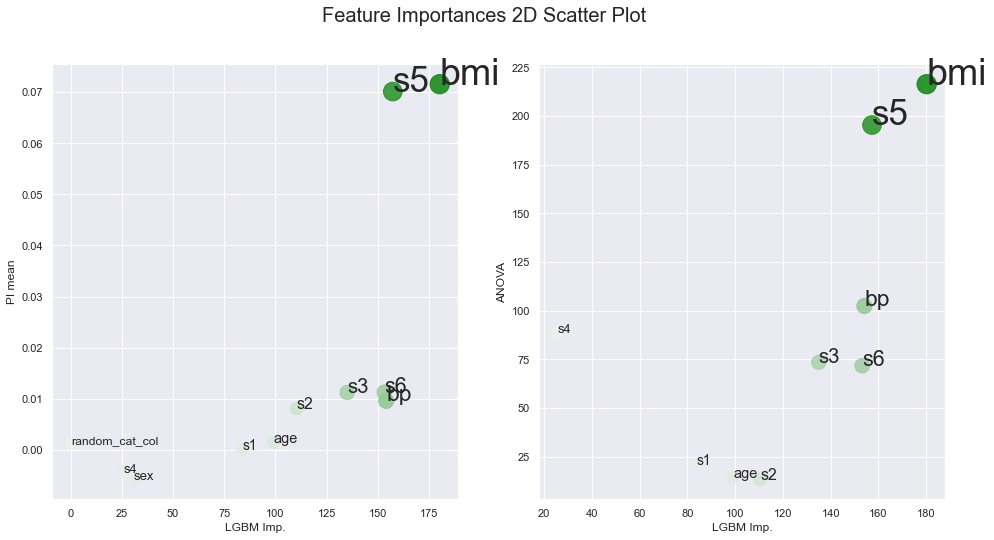

In [5]:
fig = get_fi_plots(fi_df, x=['LGBM Imp.', 'LGBM Imp.'], y=['PI mean', 'ANOVA'])
fig.savefig('outputs/feature_importances_2d.png')

In [ ]:
from mpl_toolkits import mplot3d
import gif

# Creating dataset
fi_df_droptt = fi_df.drop('TT (Sec)', axis=0)
xx = fi_df_droptt['LGBM Imp.']
yy = fi_df_droptt['PI mean']
zz = fi_df_droptt['ANOVA']
rank = fi_df_droptt['Rank']
features = fi_df_droptt.index

# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(xx, yy, zz, c=rank+1, s=(rank+1)*200, cmap=cm)
plt.title("Feature Importances 3D Scatter Plot", fontsize=20)
for i in range(fi_df_droptt.shape[0]):
    ax.text(xx[i], yy[i], zz[i], features[i], fontsize=(rank[i]+1)*20)

# Set labels
ax.set_xlabel('LGBM Imp.')
ax.set_ylabel('PI mean')
ax.set_zlabel('ANOVA')

# Rotate the axes and update
for angle in range(0, 720):
    ax.view_init(30, angle/2)
    plt.draw()
    fig.savefig(f"outputs/angles/{angle/2}.png")
    plt.pause(.001)

In [51]:
import imageio

with imageio.get_writer('outputs/feature_importance_3d.gif', mode='I', duration=0.1) as writer:
    for filename in [f"outputs/angles/{angle/2}.png" for angle in range(0, 720)]:
        image = imageio.imread(filename)
        writer.append_data(image)